This project's objective is to predict the likelihood of rain in Australia for the following day using machine learning techniques. The approach involves employing logistic regression and evaluating several variables such as temperature, humidity, and wind speed. This analysis aims to uncover the relationships between these factors and the possibility of rain, contributing to a more informed understanding of weather forecasting.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(7,3)

# Importing Dataset

In [2]:
df=pd.read_csv(r"C:\Users\alika\OneDrive\Desktop\weatherAUS.csv")

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Exploaratory Data Analaysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

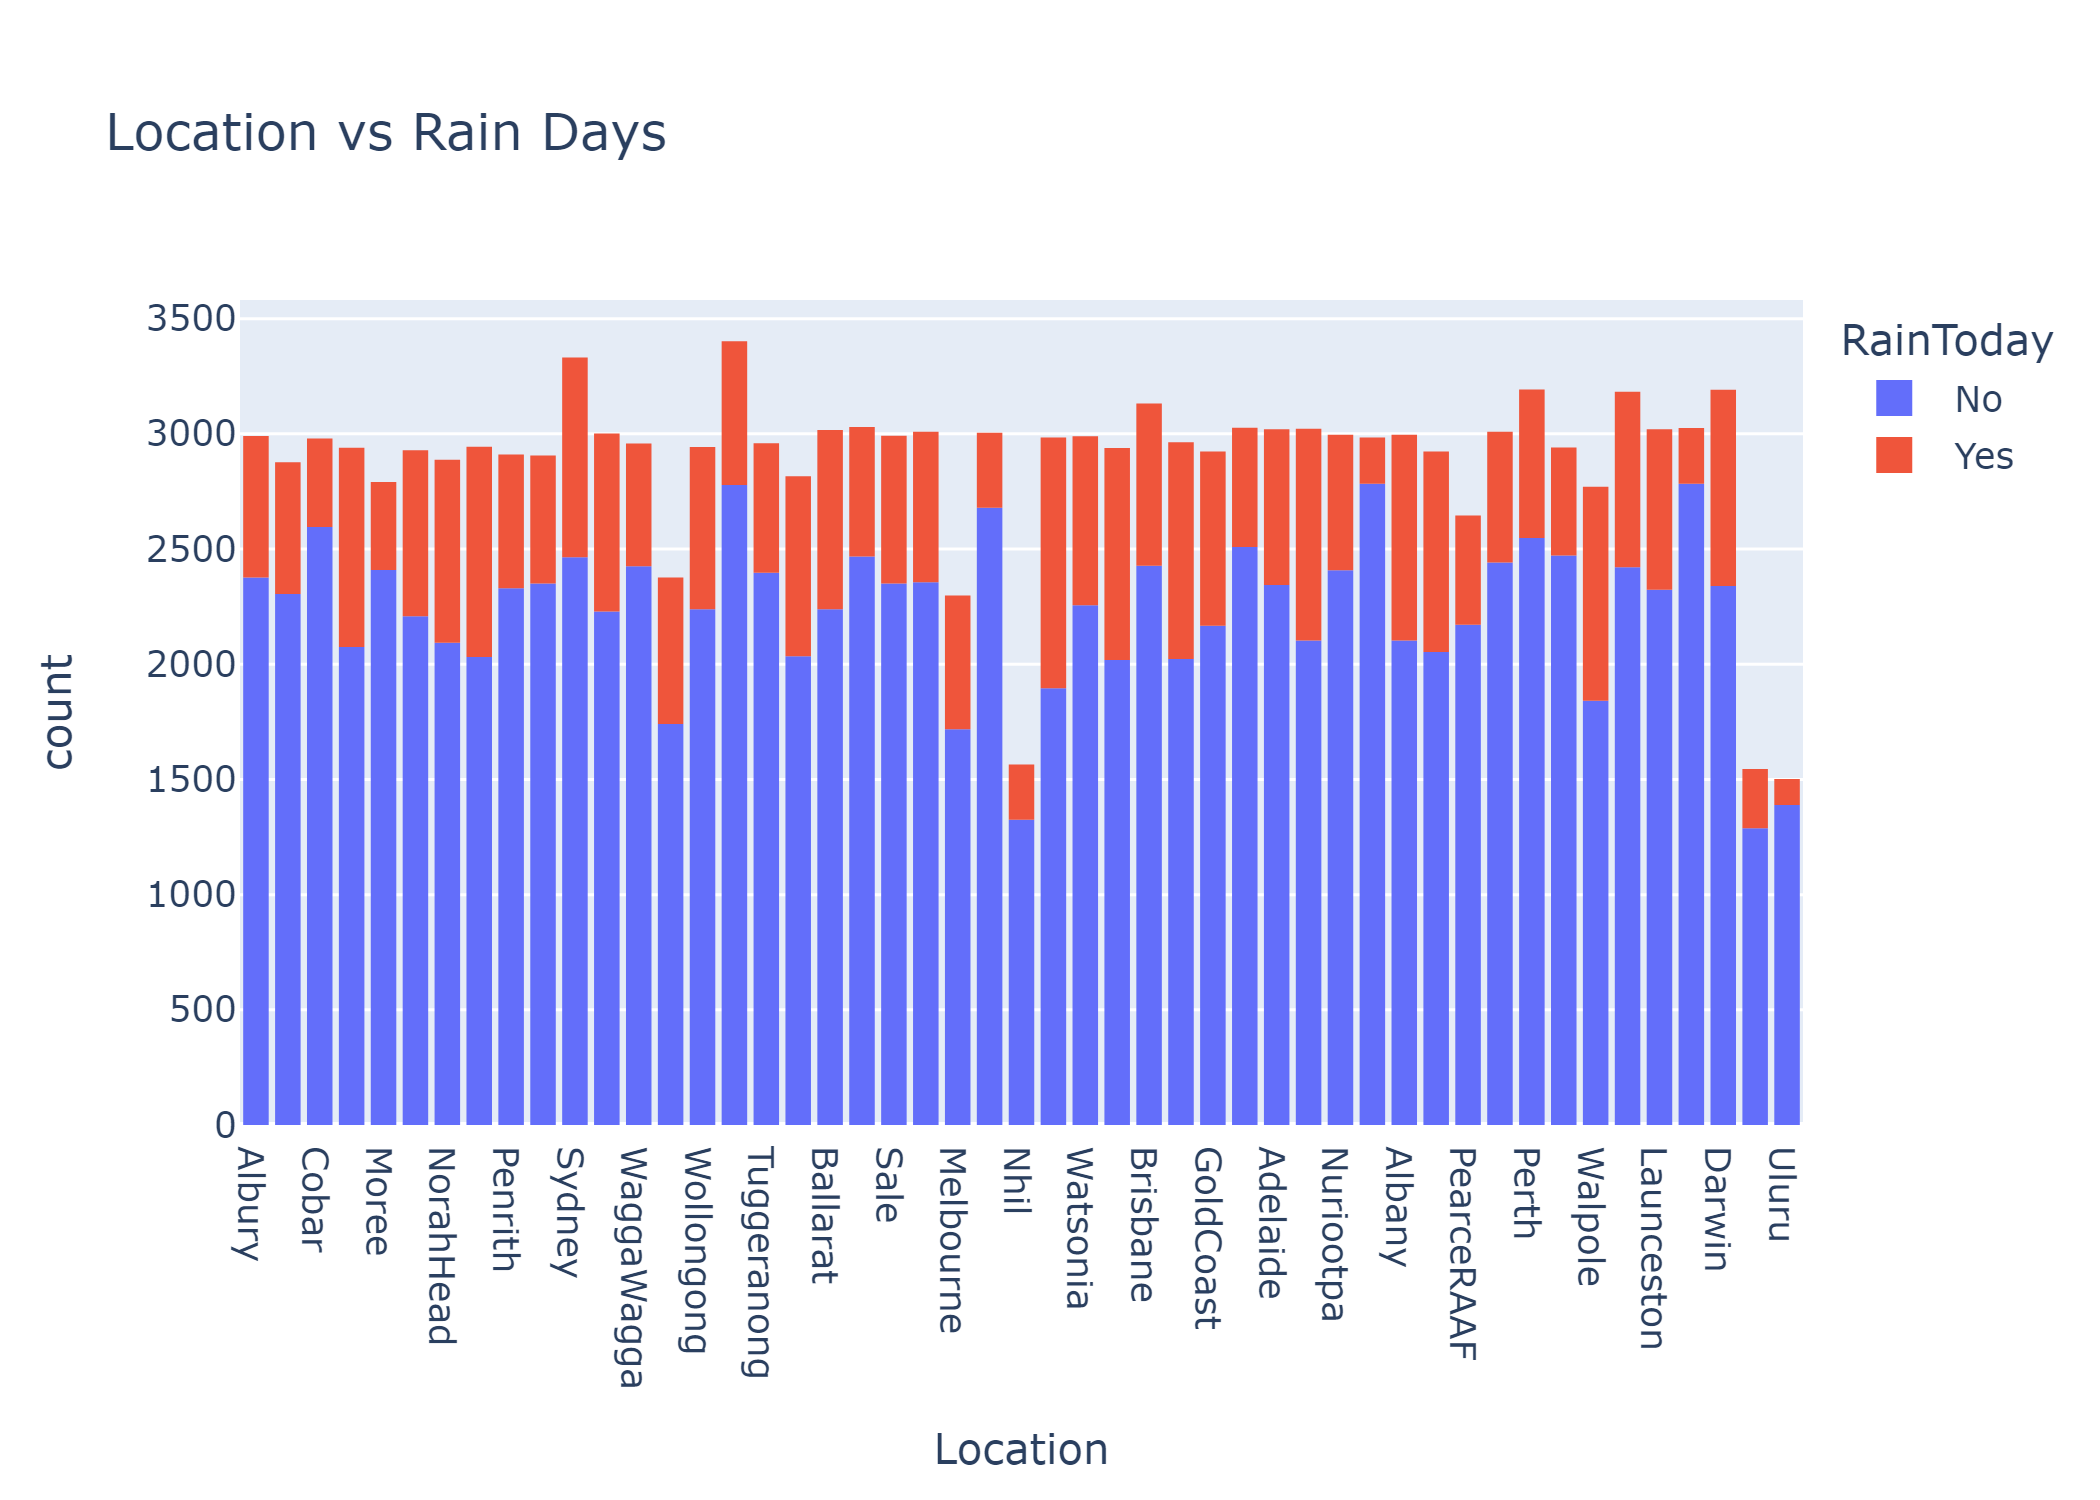

In [6]:
fig = px.histogram(df, x="Location", color="RainToday", title="Location vs Rain Days")
fig.write_image("plot.png",scale=3)
Image("plot.png")

# Location vs Rainy Days

In each location, we observe that occurance of rain is roughly 25%. In some cases, it differs. 

hence we can say, location has some degree of correlation with the status of rain

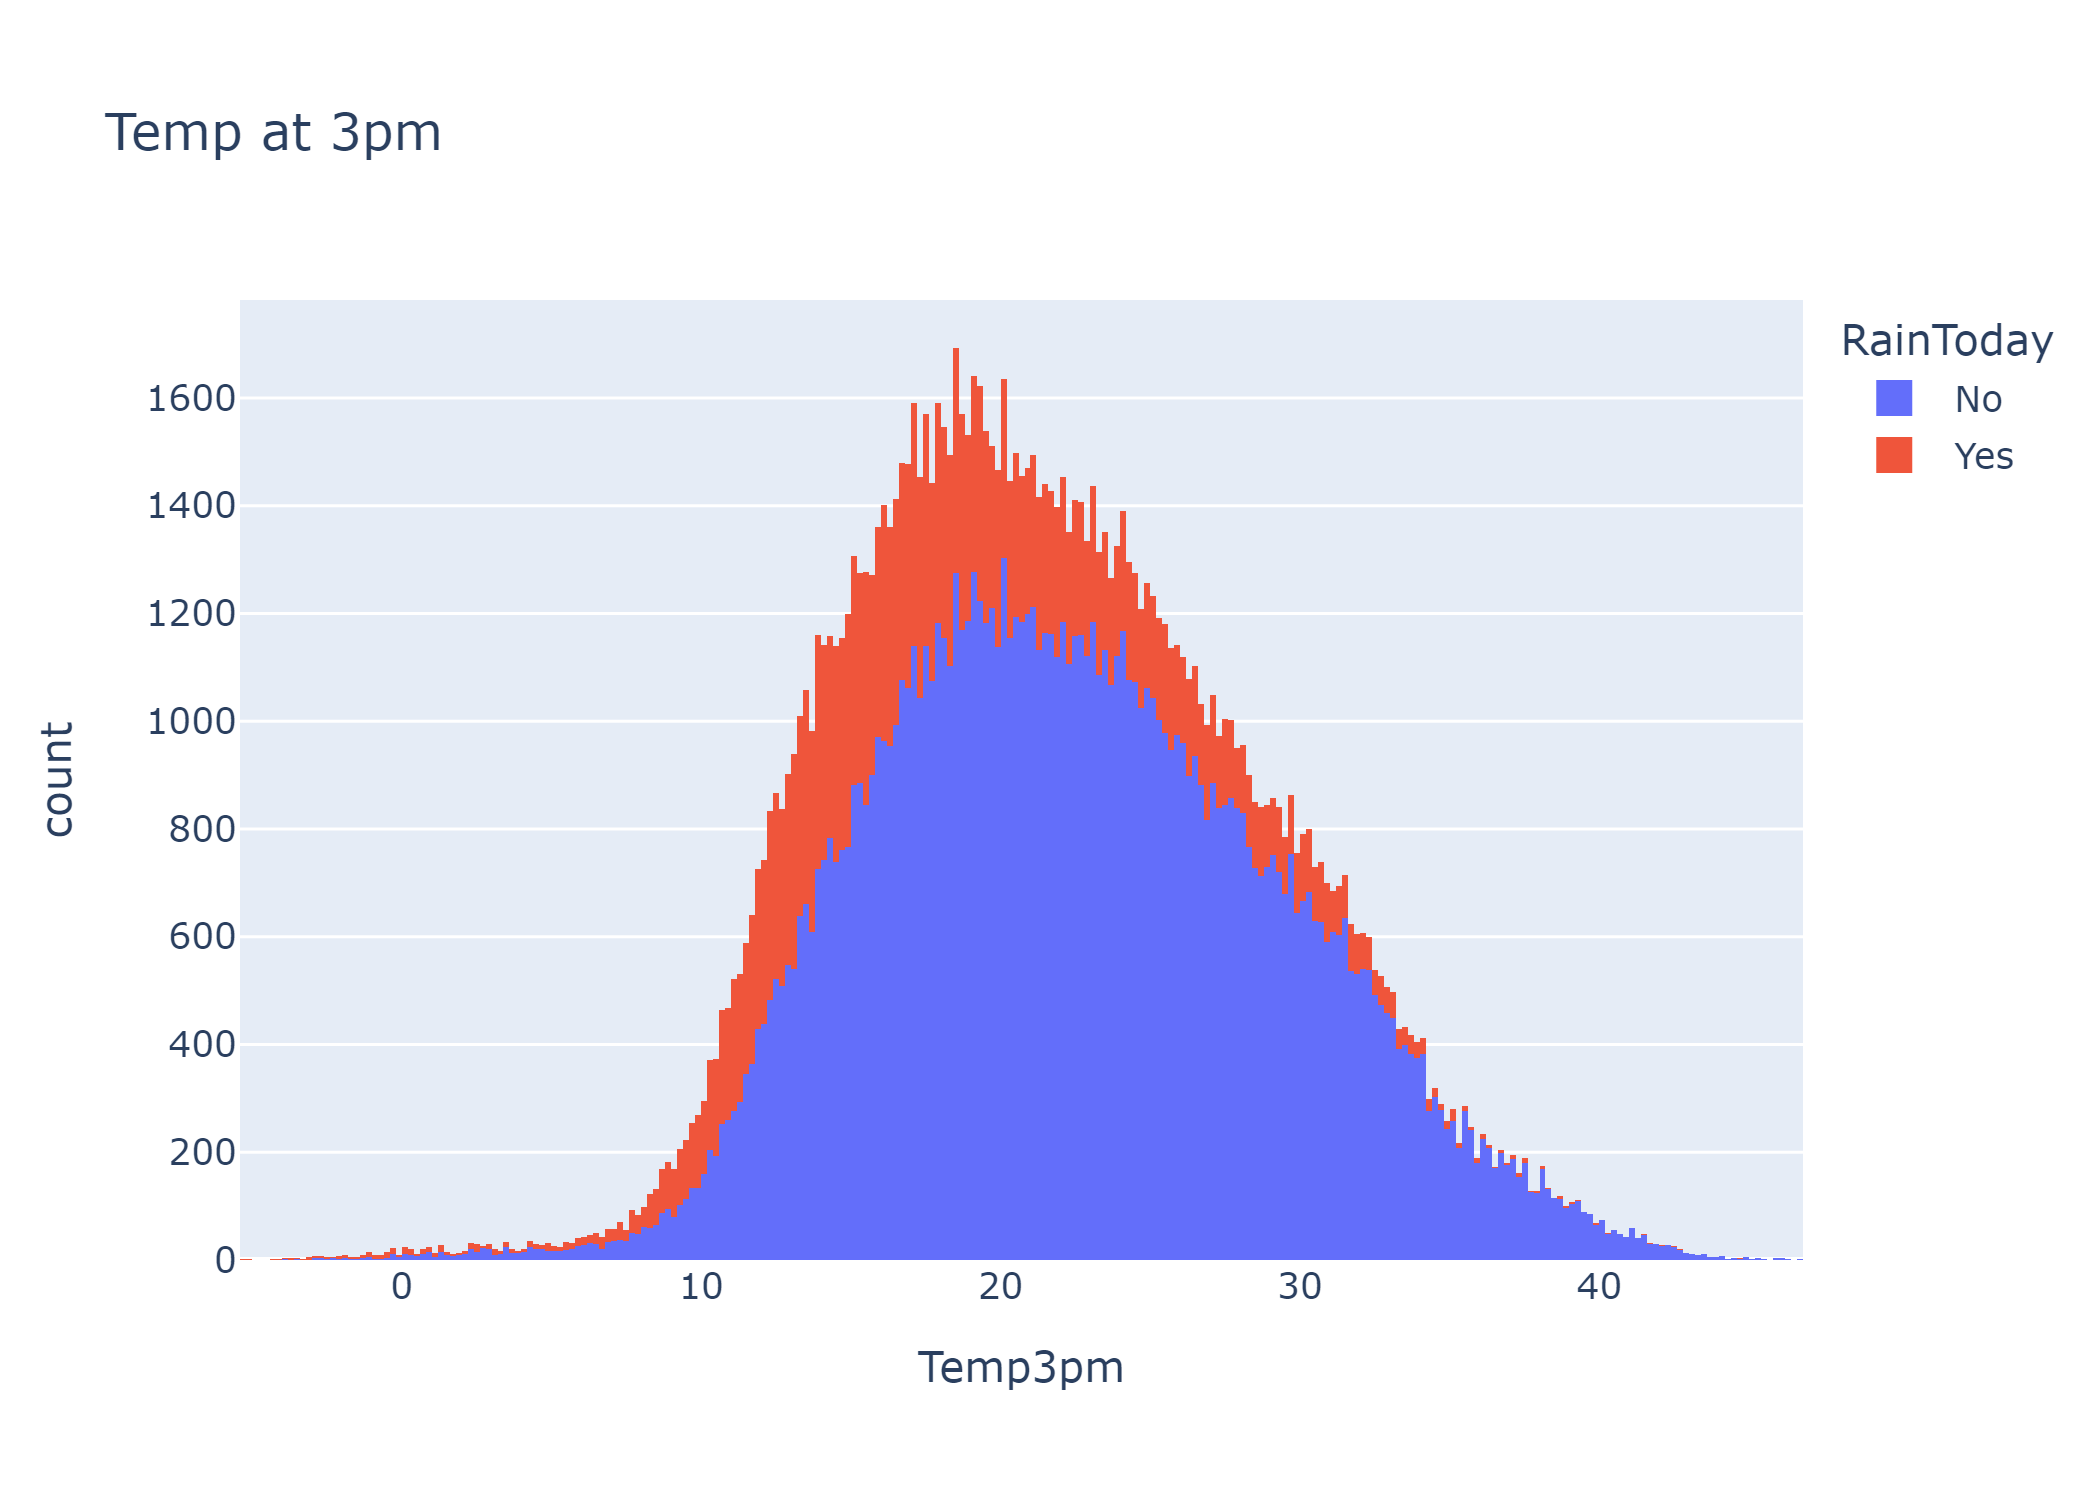

In [7]:
fig=px.histogram(df,x='Temp3pm',title='Temp at 3pm',color='RainToday')
fig.write_image("plot.png",scale=3)
Image("plot.png")

# Temp at 3pm

When the temperature is low, there is more chance of rain on that day, compared to the time when temperature is higher.

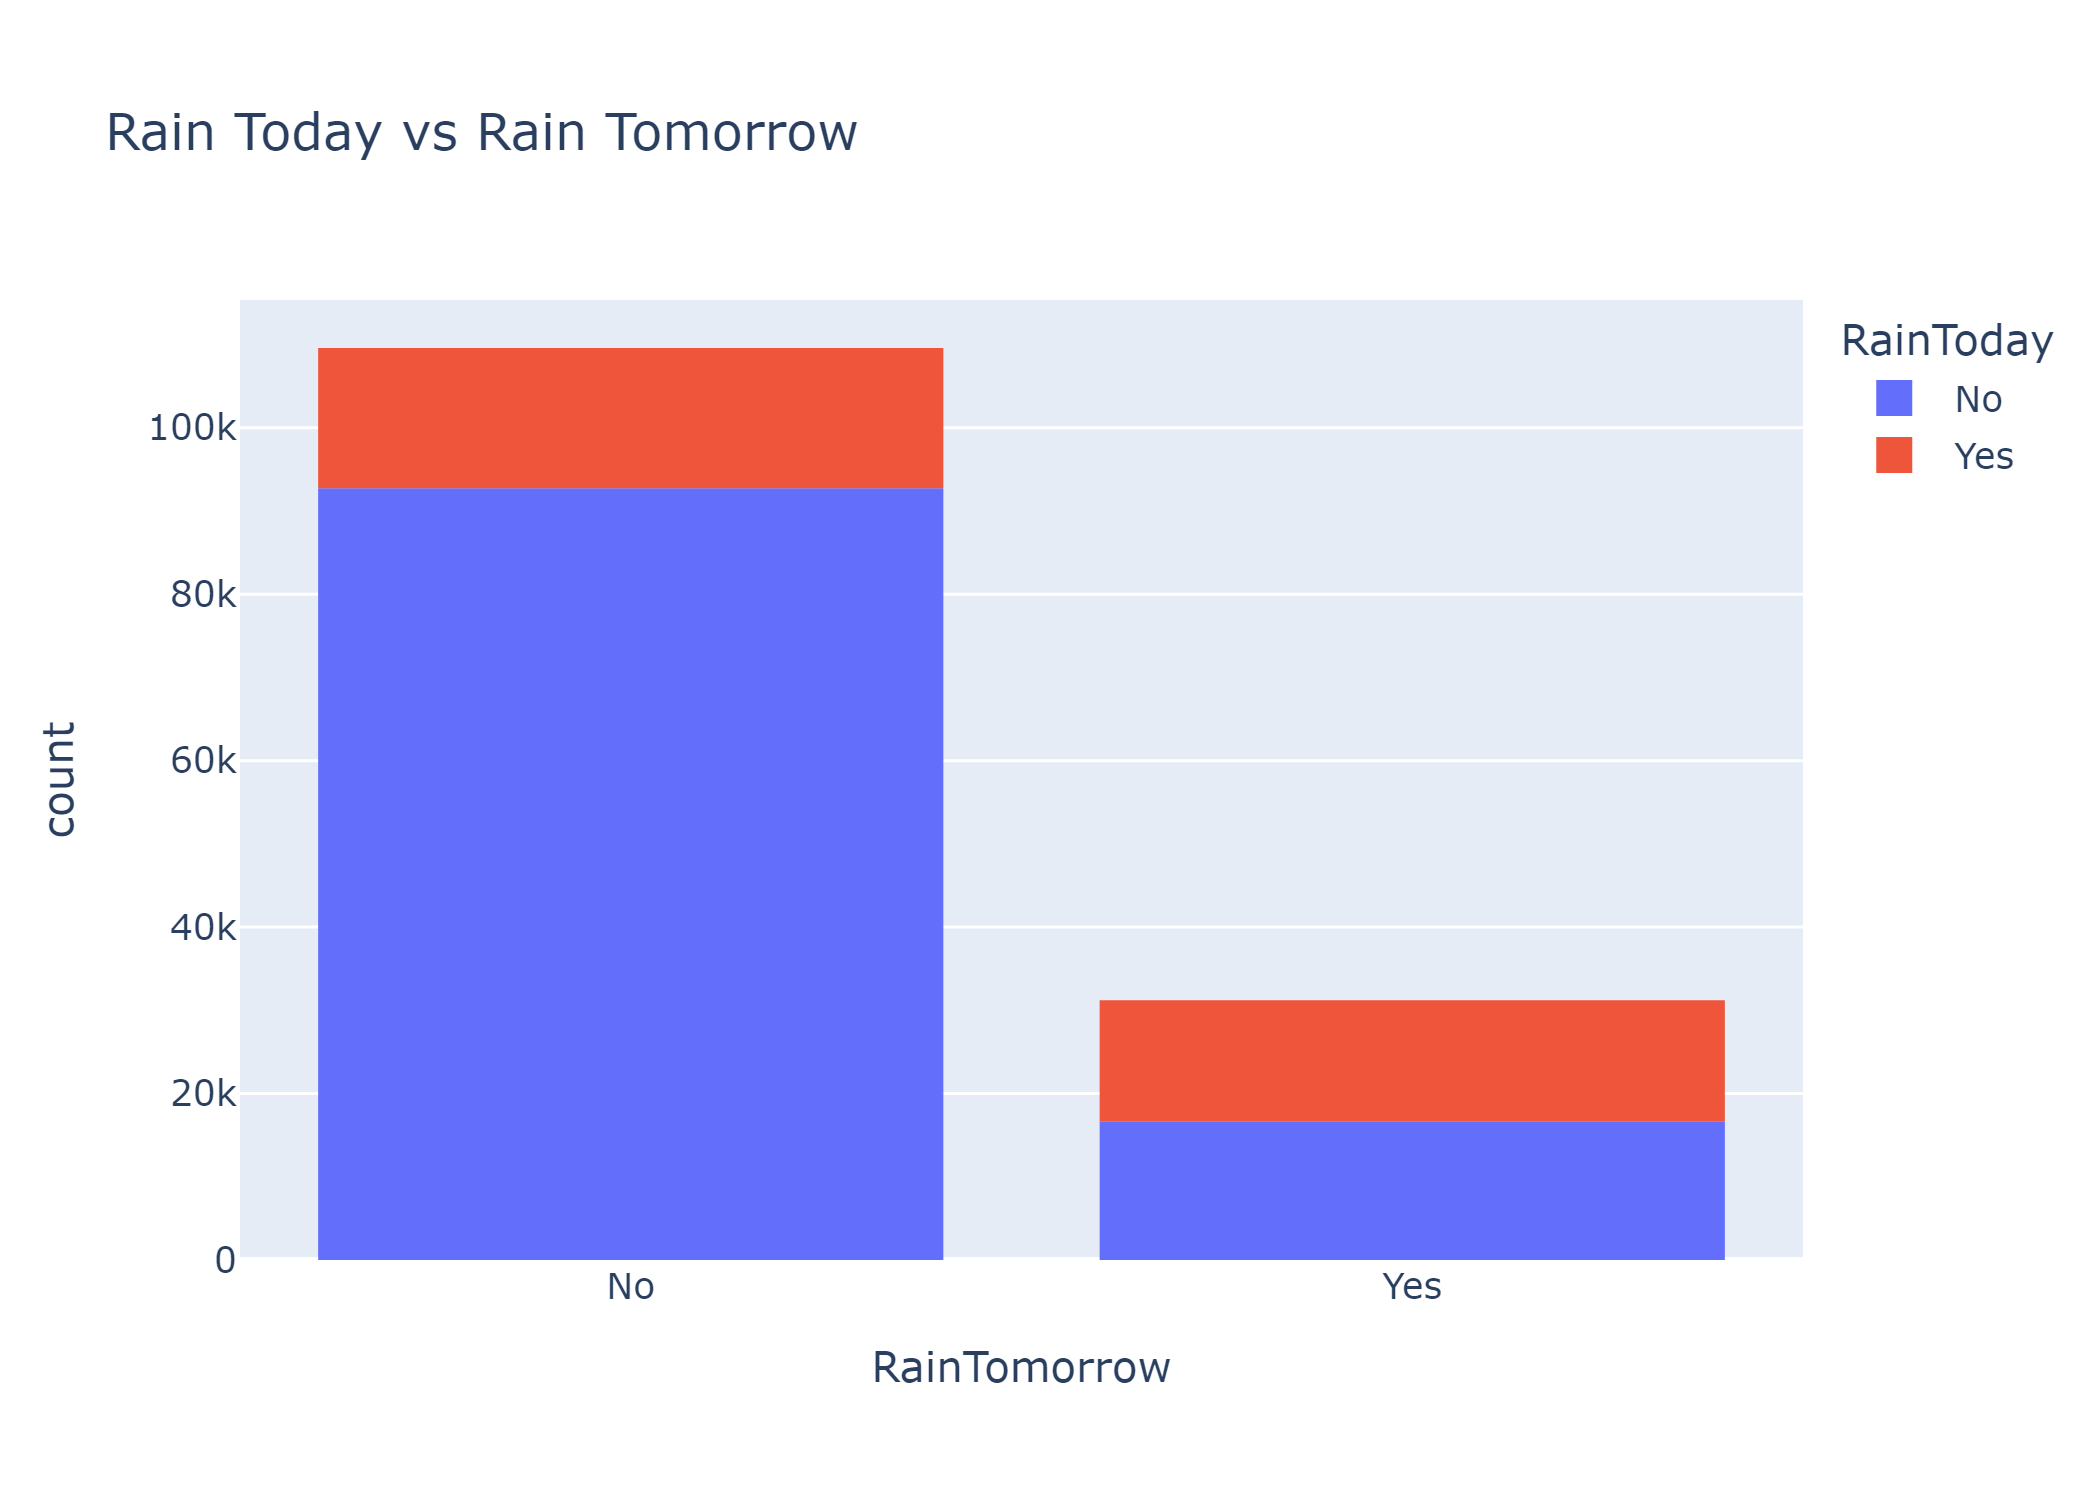

In [8]:
fig=px.histogram(df,x='RainTomorrow',title='Rain Today vs Rain Tomorrow',color='RainToday')
fig.write_image("plot.png",scale=3)
Image("plot.png")

# Rain Today vs Rain Tomorrow

If it rains tomorrow, there is an almost equal chance that it had rained the day before.

Whereas, if it doesn't rain tomorrow, there is a high chance that it didn't rain the day before


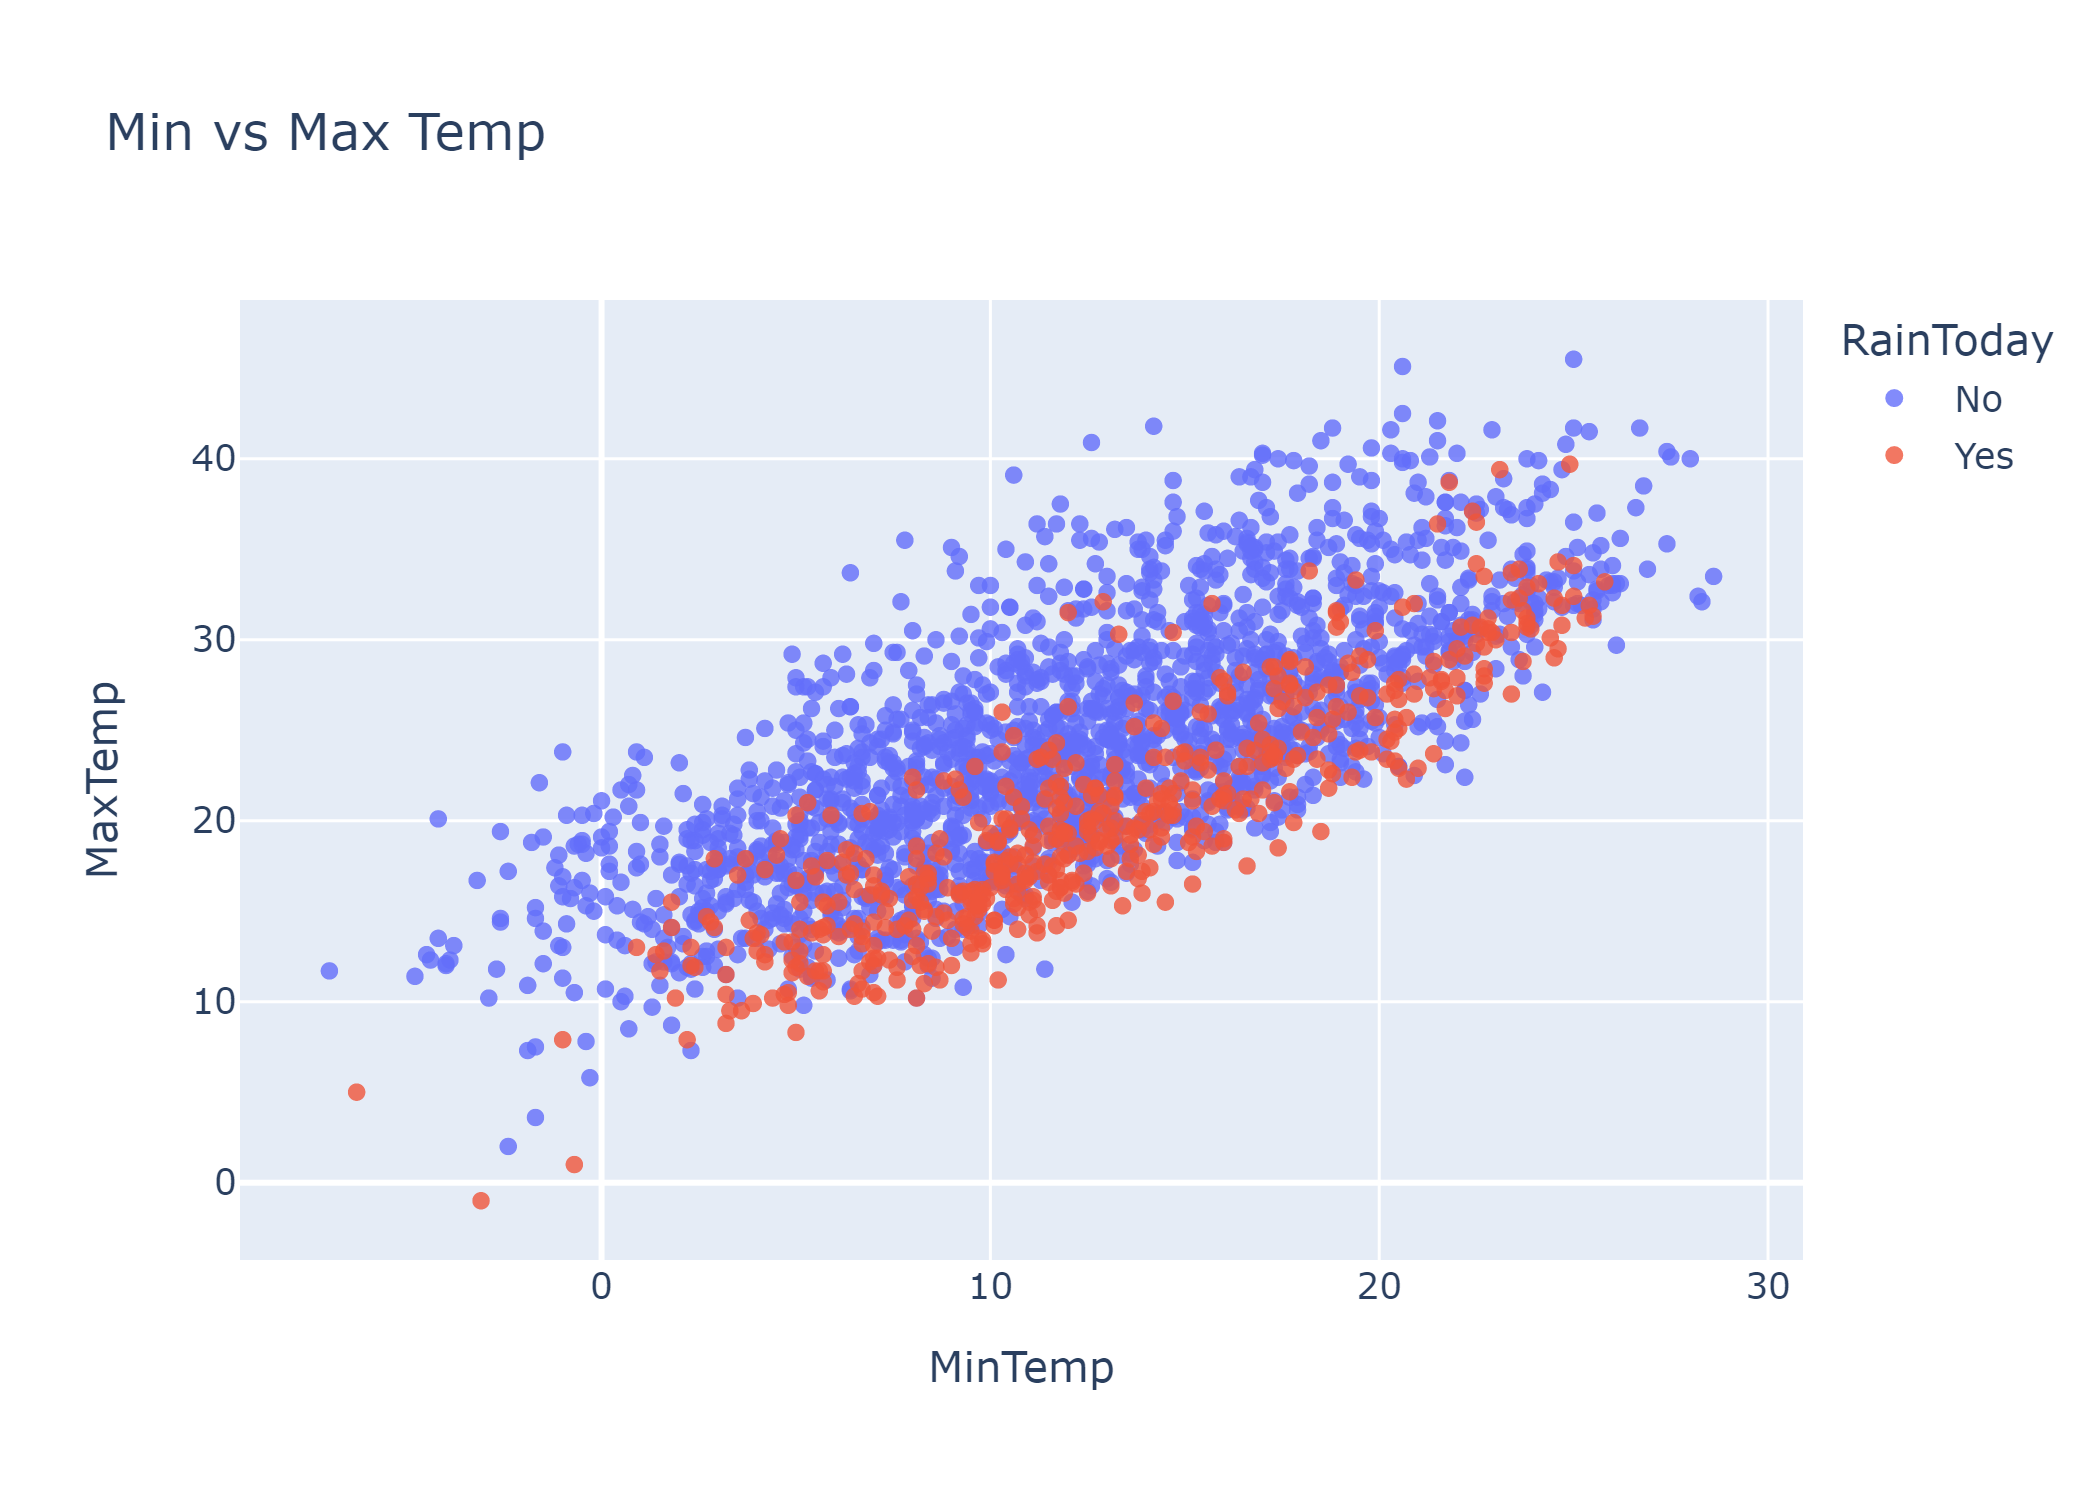

In [9]:
fig=px.scatter(df.sample(2500),x='MinTemp',y='MaxTemp',title='Min vs Max Temp',color='RainToday',opacity=0.8)
fig.write_image("plot.png",scale=3)
Image("plot.png")

# Min vs Max Temp

There is a visible positive correlation between the minimum and the maximum temperature, that is, when one one increases, the other increases, and when one decreases, the other also decreases.

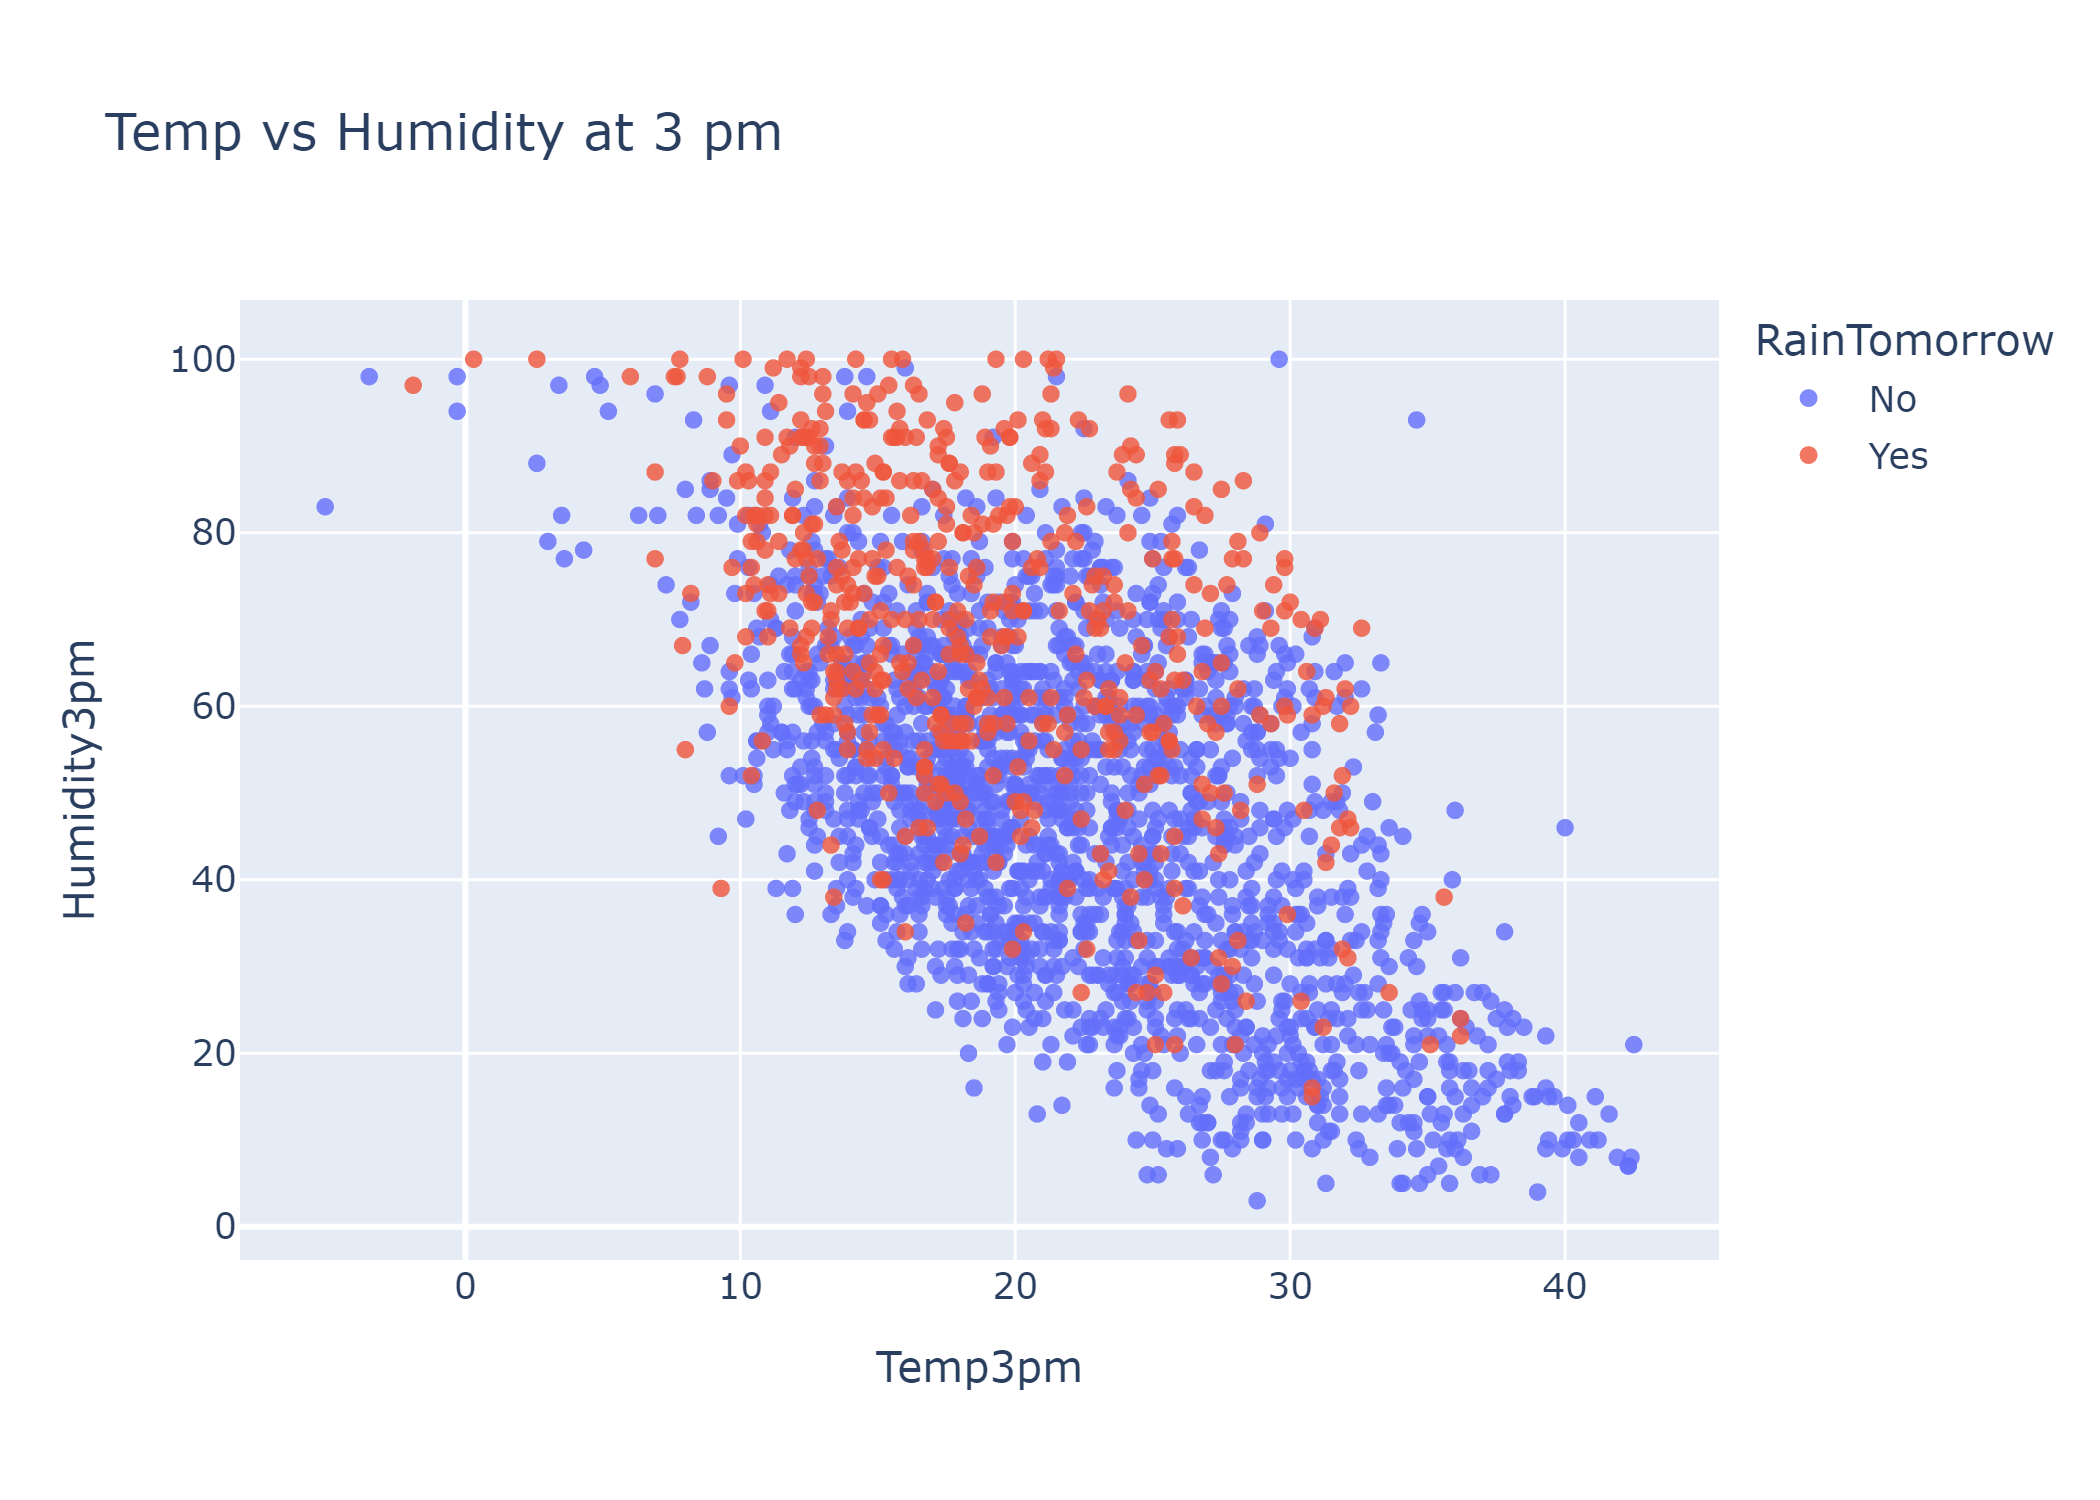

In [10]:
fig=px.scatter(df.sample(2500),x='Temp3pm',y='Humidity3pm',title='Temp vs Humidity at 3 pm',color='RainTomorrow',opacity=0.8)
fig.write_image("plot.png",scale=3)
Image("plot.png")

# Temp vs Humidity at 3pm

When temperature at 3p is low, the humidity levels are usually high, with chances of rain.

whereas, when temperature at 3p is high, the humidity levels are usually low, with less chances of rain.

In [11]:
df.sample(frac=0.1).copy()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
17793,2016-08-07,Newcastle,10.9,17.8,2.2,NaN,NaN,NaN,NaN,NaN,...,77.0,NaN,NaN,NaN,5.0,NaN,12.5,NaN,Yes,No
115728,2012-02-13,PearceRAAF,15.8,31.5,0.0,NaN,11.8,WSW,46.0,ESE,...,55.0,44.0,1016.5,1013.7,2.0,2.0,24.8,29.3,No,No
18218,2009-04-14,NorahHead,17.6,24.7,5.4,NaN,NaN,W,24.0,WNW,...,87.0,81.0,1015.1,1011.4,NaN,NaN,20.1,21.4,Yes,No
4652,2013-08-29,BadgerysCreek,5.6,21.4,0.0,NaN,NaN,N,22.0,SSE,...,96.0,53.0,1024.4,1018.6,NaN,NaN,12.4,20.7,No,No
108494,2017-04-10,Woomera,8.7,21.7,0.0,6.8,NaN,SSW,39.0,SSE,...,56.0,35.0,1025.4,1022.1,7.0,NaN,14.2,20.4,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41915,2015-10-03,Williamtown,11.3,31.7,0.0,NaN,NaN,WNW,30.0,NW,...,71.0,25.0,1032.0,1025.6,NaN,NaN,20.5,31.0,No,No
113840,2015-05-08,Witchcliffe,8.3,20.1,0.6,NaN,NaN,SSW,31.0,N,...,99.0,64.0,1028.5,1026.1,NaN,NaN,13.9,19.3,No,Yes
8404,2015-09-11,Cobar,6.4,24.2,0.0,5.2,NaN,NNE,50.0,ENE,...,47.0,22.0,1029.9,1025.9,NaN,NaN,16.6,23.8,No,No
8544,2016-01-29,Cobar,20.0,29.8,0.0,10.6,NaN,W,41.0,SW,...,50.0,33.0,1002.6,1000.6,1.0,2.0,21.9,27.7,No,No


# Adding a month column by extracting it from "Date" column

In [12]:
df['Month']=pd.to_datetime(df['Date']).dt.strftime('%B')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,December
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,December
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,December
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,December
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,June
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,June
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,June
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,June


# Dividing the dataset into "TRAIN",  "VALIDATION" and "TEST" datasets on the basis of time

In [13]:
year=pd.to_datetime(df['Date']).dt.year

<Axes: xlabel='Date', ylabel='count'>

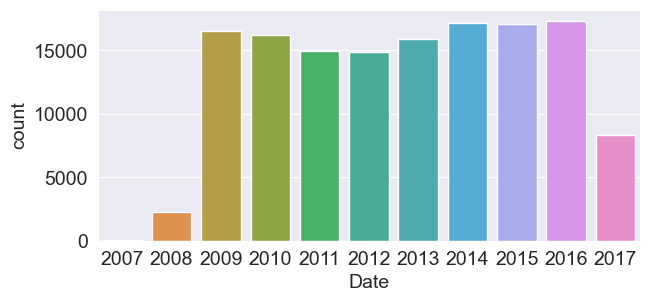

In [14]:
sns.countplot(x=year)

In [15]:
train_df=df[year<2015]
val_df=df[year==2015]
test_df=df[year>2015]

In [16]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,December
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,December
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,December
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,December
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,2014-12-27,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,...,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No,No,December
144549,2014-12-28,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,...,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No,No,December
144550,2014-12-29,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,...,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No,No,December
144551,2014-12-30,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,...,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No,No,December


In [17]:
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
2133,2015-01-01,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,...,14.0,1013.5,1011.0,NaN,NaN,21.0,32.7,No,No,January
2134,2015-01-02,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,...,12.0,1016.0,1012.4,NaN,NaN,25.6,38.2,No,No,January
2135,2015-01-03,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,...,19.0,1017.9,1012.3,NaN,NaN,29.2,37.0,No,No,January
2136,2015-01-04,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,...,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,No,No,January
2137,2015-01-05,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,...,34.0,1017.4,1014.7,8.0,NaN,25.6,32.5,No,No,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,2015-12-27,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,...,12.0,1013.2,1010.1,NaN,NaN,24.3,33.0,No,No,December
144914,2015-12-28,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,...,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0,No,No,December
144915,2015-12-29,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,...,7.0,1012.6,1007.5,NaN,NaN,28.1,34.7,No,No,December
144916,2015-12-30,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,...,12.0,1007.2,1002.6,NaN,1.0,31.3,38.4,No,No,December


In [18]:
test_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
2498,2016-01-01,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,...,17.0,1013.4,1009.2,7.0,3.0,26.1,36.7,No,No,January
2499,2016-01-02,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,...,30.0,1011.1,1008.4,8.0,8.0,24.8,31.7,No,Yes,January
2500,2016-01-03,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,...,67.0,1014.0,1014.8,8.0,8.0,21.8,19.5,Yes,Yes,January
2501,2016-01-04,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,...,65.0,1017.9,1016.5,8.0,8.0,19.2,21.6,Yes,Yes,January
2502,2016-01-05,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,...,63.0,1016.3,1013.9,8.0,8.0,17.2,22.2,Yes,No,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,June
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,June
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,June
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,June


In [19]:
c=df.columns.to_list()
c

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Month']

# Specifying the "INPUT" and "TARGET" columns

We will be predicting, using our model, whether it will rain tomorrow or not. Hence, our target column will be "RainTomorrow".

Here, as we can observe, the column 'Date', will not have any impact on the prediction, hence we can ignore it.

In [20]:
input_cols=c[1:-2]+[c[-1]]
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'Month']

In [21]:
target_cols="RainTomorrow"

# Creating the "INPUT" and "TARGET" datasets for traning, validating and testing the models

In [22]:
input_train=train_df[input_cols]
target_train=train_df[target_cols]

In [23]:
input_val=val_df[input_cols]
target_val=val_df[target_cols]

In [24]:
input_test=test_df[input_cols]
target_test=test_df[target_cols]

# Dividing input columns, into "NUMERIC" and "CATEGORICAL" columns

In [25]:
num_cols=input_train.select_dtypes(np.number).columns.tolist()

In [26]:
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [27]:
cat_cols=input_train.select_dtypes(object).columns

In [28]:
cat_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'Month'],
      dtype='object')

Statistics of the numeric columns

In [29]:
input_train[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [30]:
input_train[cat_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
Month          12
dtype: int64

In [31]:
input_train[num_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [32]:
input_train[num_cols].mean()

MinTemp            12.007831
MaxTemp            23.022202
Rainfall            2.372935
Evaporation         5.289991
Sunshine            7.609004
WindGustSpeed      40.215873
WindSpeed9am       14.092263
WindSpeed3pm       18.764608
Humidity9am        68.628745
Humidity3pm        51.469547
Pressure9am      1017.513734
Pressure3pm      1015.132352
Cloud9am            4.302952
Cloud3pm            4.410677
Temp9am            16.835126
Temp3pm            21.540138
dtype: float64

# Imputing Missing Numeric Data

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy='mean')

In [35]:
df[num_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [36]:
input_train[num_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [37]:
input_val[num_cols].isna().sum()

MinTemp            34
MaxTemp            29
Rainfall            0
Evaporation      8335
Sunshine         9038
WindGustSpeed     875
WindSpeed9am       71
WindSpeed3pm      362
Humidity9am       212
Humidity3pm       661
Pressure9am      1977
Pressure3pm      1977
Cloud9am         6506
Cloud3pm         6933
Temp9am            22
Temp3pm           471
dtype: int64

In [38]:
input_test[num_cols].isna().sum()

MinTemp            120
MaxTemp             91
Rainfall             0
Evaporation      15028
Sunshine         17721
WindGustSpeed     1402
WindSpeed9am       110
WindSpeed3pm      1100
Humidity9am        253
Humidity3pm       1724
Pressure9am       2654
Pressure3pm       2661
Cloud9am         11131
Cloud3pm         13139
Temp9am             60
Temp3pm           1557
dtype: int64

# Fitting the imputer to the data

Computing the chosen statistic (for eg. mean) for each column

In [39]:
imputer.fit(df[num_cols])

SimpleImputer()

In [40]:
imputer.statistics_.tolist()

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

Filling the missing values on the train, validation and test dataset using the transform method of the imputer

In [95]:
input_train[num_cols]=imputer.transform(input_train[num_cols]).copy()
input_val[num_cols]=imputer.transform(input_val[num_cols]).copy()
input_test[num_cols]=imputer.transform(input_test[num_cols]).copy()


In [42]:
input_train[num_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Scaling the numeric values between 0 and 1

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler=MinMaxScaler()

Fit the scaler to the data to compute the range of values for each numeric column

In [45]:
scaler.fit(df[num_cols])

MinMaxScaler()

Scaling the training, validation and testing set using the transform method of scaler

In [96]:
input_train[num_cols]=scaler.transform(input_train[num_cols]).copy()
input_val[num_cols]=scaler.transform(input_val[num_cols]).copy()
input_test[num_cols]=scaler.transform(input_test[num_cols]).copy()

In [47]:
input_train[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.525947,0.006396,0.036949,0.525366,0.265107,0.108395,0.215668,0.686309,0.514693,0.612014,0.608705,0.483192,0.493693,0.507089,0.517103
std,0.149458,0.131904,0.022962,0.021628,0.200931,0.102420,0.068800,0.101424,0.189008,0.206376,0.111335,0.106611,0.255486,0.238028,0.134722,0.130726
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037741,0.526244,0.255814,0.100000,0.218391,0.690000,0.520000,0.614125,0.610527,0.492351,0.499917,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


In [48]:
input_test[num_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [49]:
input_val[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,17089.000000,17089.000000,17089.000000,17089.000000,17089.000000,17089.000000,17089.000000,17089.000000,17089.000000,17089.000000,17089.000000,17089.000000,17089.000000,17089.000000,17089.000000,17089.000000
mean,0.488169,0.535024,0.005756,0.039376,0.530007,0.260407,0.106301,0.212045,0.681348,0.504519,0.635476,0.630254,0.495680,0.500116,0.512645,0.523776
std,0.154319,0.141261,0.022310,0.022941,0.176785,0.097925,0.066596,0.099314,0.197920,0.207212,0.111066,0.107436,0.255682,0.237140,0.143843,0.137758
min,0.007075,0.030246,0.000000,0.000000,0.000000,0.007752,0.000000,0.000000,0.040000,0.000000,0.125620,0.081600,0.000000,0.000000,0.021097,0.026871
25%,0.375000,0.429112,0.000000,0.035862,0.526244,0.193798,0.053846,0.149425,0.560000,0.360000,0.568595,0.564800,0.333333,0.444444,0.409283,0.424184
50%,0.485849,0.525520,0.000000,0.037741,0.526244,0.255814,0.100000,0.214151,0.690000,0.514493,0.614876,0.611200,0.492351,0.499917,0.508439,0.518234
75%,0.601415,0.637051,0.001617,0.037741,0.572414,0.310078,0.146154,0.275862,0.830000,0.640000,0.705785,0.699200,0.666667,0.666667,0.616034,0.618042
max,0.952830,0.948960,0.666307,0.485517,1.000000,1.000000,0.669231,0.850575,1.000000,1.000000,0.971901,0.963200,0.888889,0.888889,0.943038,0.925144


In [50]:
input_test[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000
mean,0.503496,0.541912,0.006483,0.039674,0.527090,0.258541,0.105539,0.209768,0.700337,0.520359,0.607981,0.604361,0.525045,0.523504,0.520846,0.528656
std,0.152404,0.137969,0.022592,0.022183,0.145176,0.101742,0.066321,0.095930,0.185698,0.200550,0.111127,0.106310,0.243166,0.216358,0.138885,0.132027
min,0.016509,0.000000,0.000000,0.000000,0.000000,0.007752,0.000000,0.000000,0.040000,0.030000,0.024793,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.391509,0.436673,0.000000,0.037741,0.526244,0.193798,0.053846,0.149425,0.580000,0.380000,0.540496,0.536000,0.492351,0.499917,0.419831,0.433781
50%,0.500000,0.533081,0.000000,0.037741,0.526244,0.255814,0.100000,0.214151,0.710000,0.514493,0.614125,0.610527,0.492351,0.499917,0.514768,0.520023
75%,0.613208,0.638941,0.002156,0.037741,0.526244,0.310078,0.146154,0.252874,0.840000,0.650000,0.674380,0.668800,0.777778,0.666667,0.618143,0.616123
max,0.941038,0.984877,0.606469,1.000000,0.972414,0.883721,1.000000,0.747126,1.000000,1.000000,0.988430,0.950400,0.888889,0.888889,0.945148,1.000000


# Encoding the "CATEGORICAL" columns

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')

Fit the encoder to the data 

In [97]:
encoder.fit(df[cat_cols])

C:\Users\alika\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [54]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

Generating column names for each category

In [55]:
enc_cols=list(encoder.get_feature_names_out(cat_cols))
enc_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

Encoding the training, validation and test sets

In [98]:
input_train[enc_cols]=encoder.transform(input_train[cat_cols]).copy()
input_val[enc_cols]=encoder.transform(input_val[cat_cols]).copy()
input_test[enc_cols]=encoder.transform(input_test[cat_cols]).copy()

In [57]:
input_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,Albury,0.516509,0.523629,0.001617,0.037741,0.526244,W,0.294574,W,WNW,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037741,0.526244,WNW,0.294574,NNW,WSW,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037741,0.526244,WSW,0.310078,W,WSW,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037741,0.526244,NE,0.139535,SE,E,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.037741,0.526244,W,0.271318,ENE,NW,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.718336,0.000000,0.037741,0.526244,SSE,0.286822,ESE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144549,Uluru,0.556604,0.786389,0.000000,0.037741,0.526244,NE,0.193798,ENE,SW,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144550,Uluru,0.608491,0.805293,0.000000,0.037741,0.526244,ESE,0.255814,ESE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144551,Uluru,0.674528,0.818526,0.000000,0.037741,0.526244,ESE,0.286822,ESE,SSW,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training a "LOGISTIC REGRESSION" model

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model=LogisticRegression(solver='liblinear')

In [60]:
model.fit(input_train[num_cols + enc_cols],target_train)

LogisticRegression(solver='liblinear')

# Respective weights of all the factors impacting the "TRAGET" column



In [61]:
weights_df=pd.DataFrame({'features': num_cols+enc_cols, 'weights': model.coef_[0]} )
weights_df

,features,weights
0,MinTemp,1.284436
1,MaxTemp,-2.583522
2,Rainfall,3.221939
3,Evaporation,1.237277
4,Sunshine,-1.638066
...,...,...
125,Month_March,-0.347568
126,Month_May,-0.034704
127,Month_November,-0.168424
128,Month_October,-0.099530


<Axes: xlabel='weights', ylabel='features'>

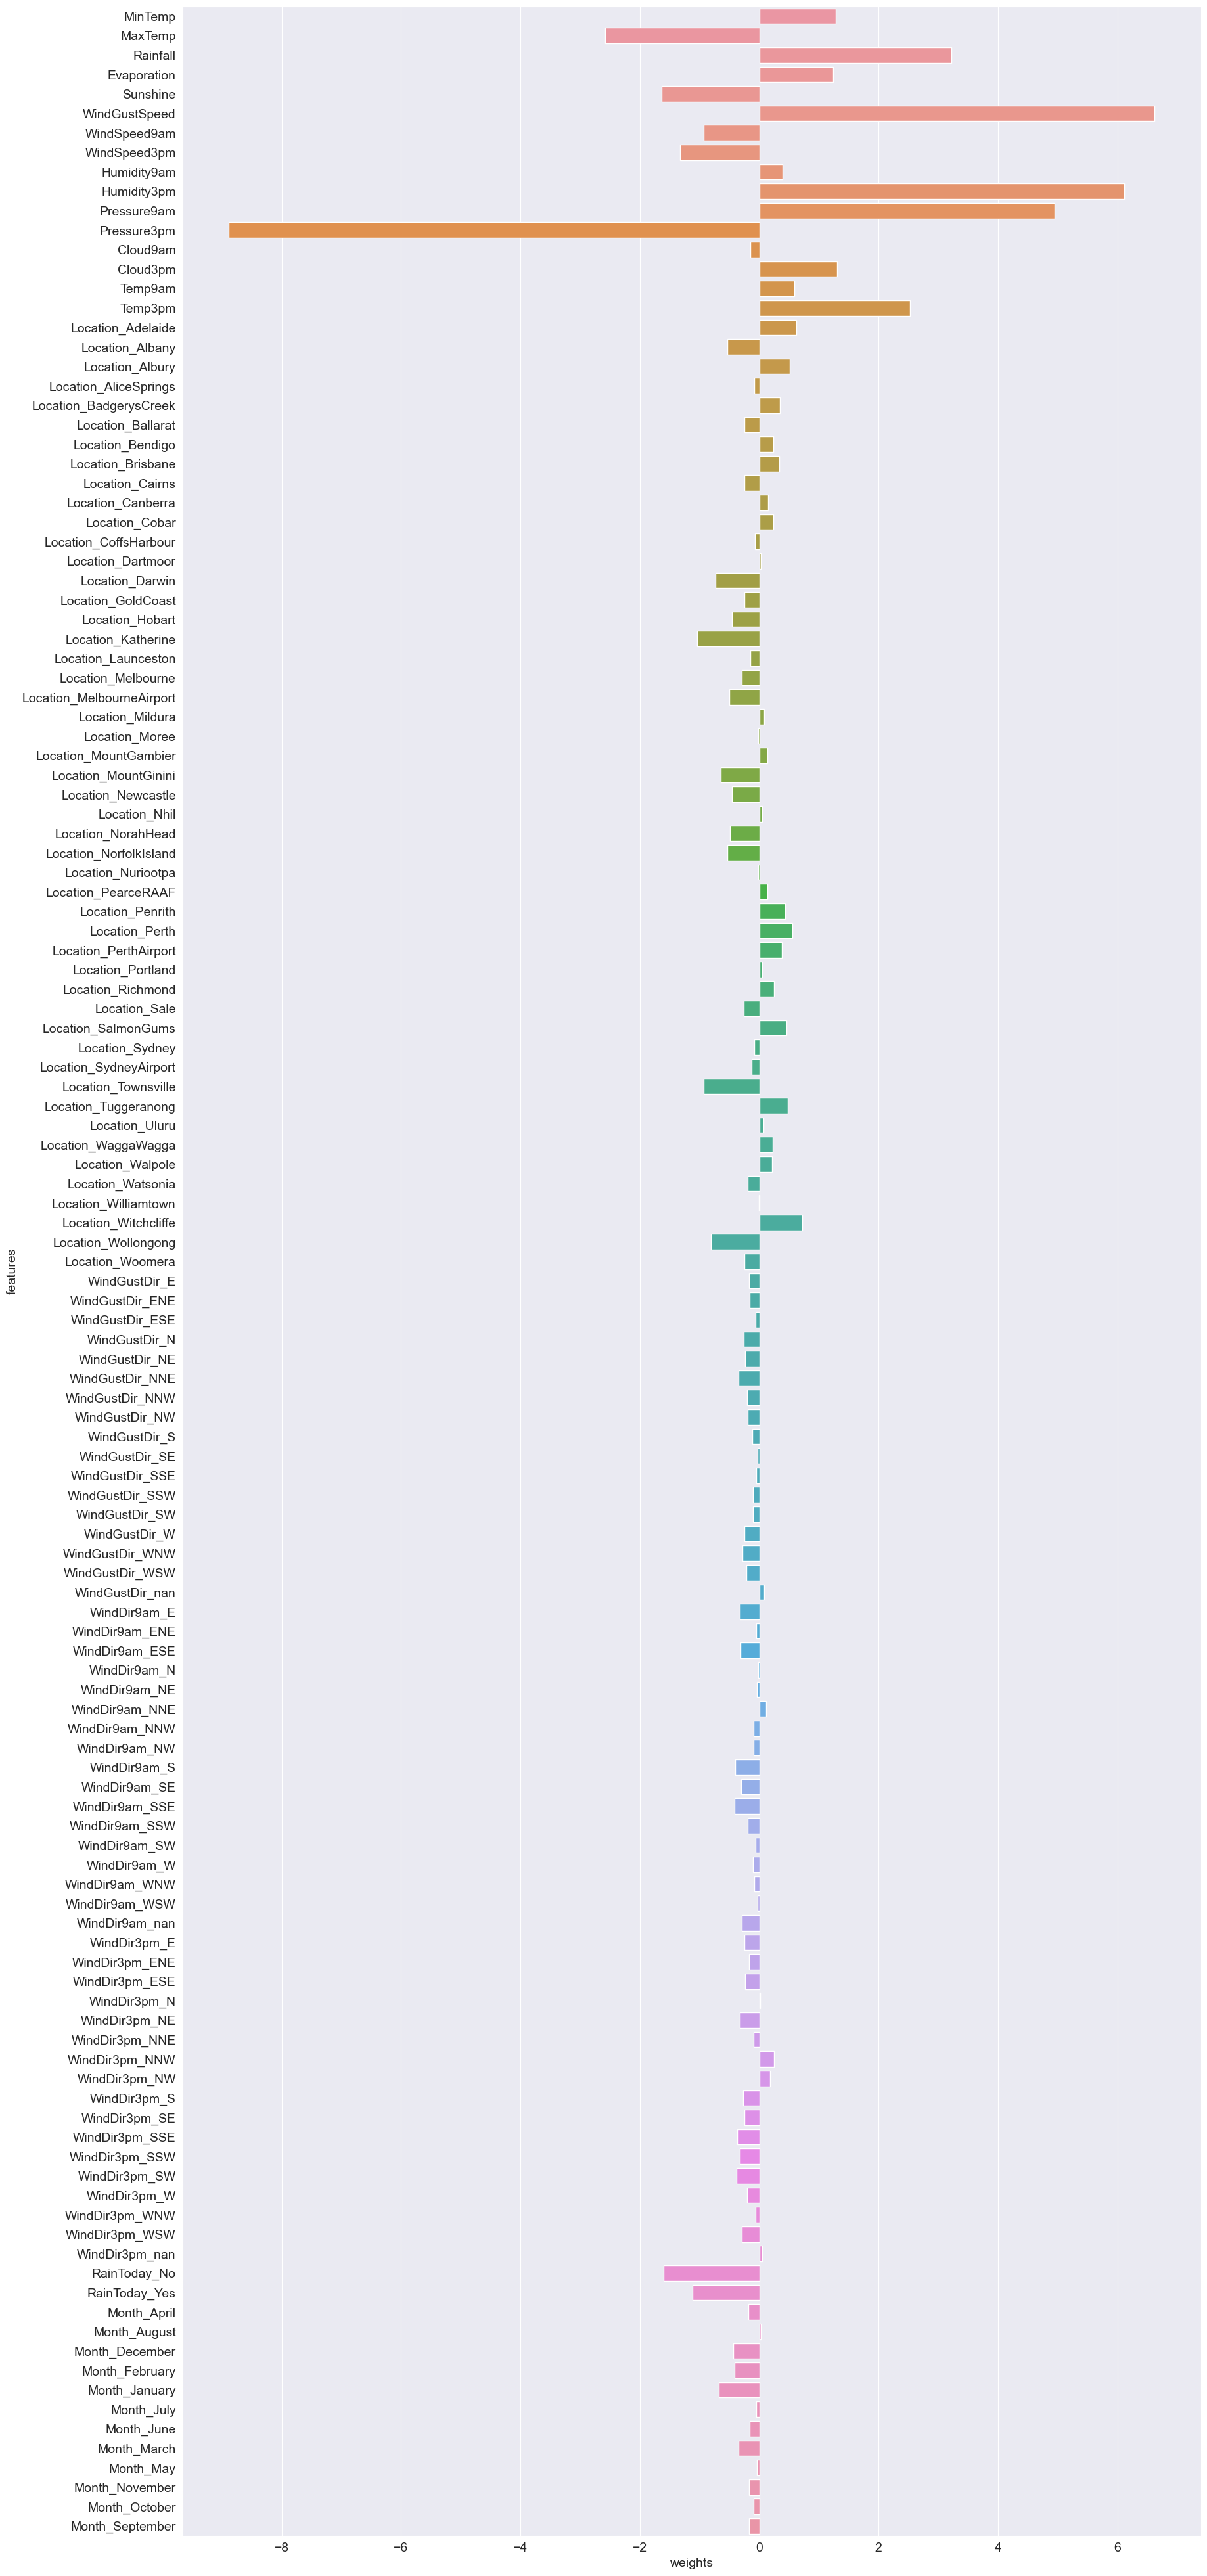

In [62]:
plt.figure(figsize=(20,50))
sns.barplot(weights_df,x='weights',y='features')

# Factors with maximum weights

Wind Gust Speed has the maximum weight, which means it has the most impact on prediction, whether it will rain tomorrow or not.

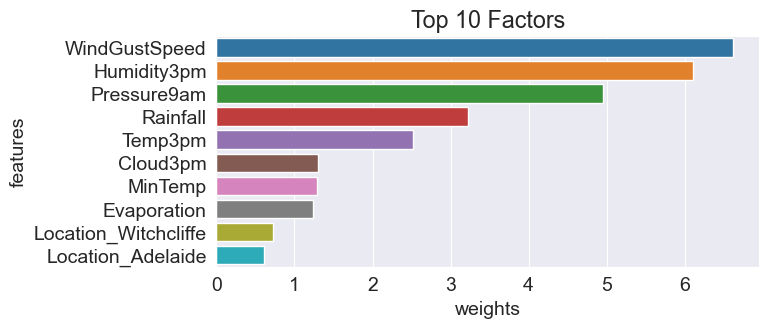

In [63]:
plt.title('Top 10 Factors')
sns.barplot(weights_df.sort_values('weights',ascending=False).head(10),x='weights',y='features')
plt.show()

In [64]:
x_train=input_train[num_cols+enc_cols]
x_val=input_val[num_cols+enc_cols]
x_test=input_test[num_cols+enc_cols]

# Prediction of whether it will rain tomorrow or not

In [65]:
pred_train=model.predict(x_train)
pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [66]:
target_train

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

# Probability of the results of Logistic Regression

In [67]:
model.predict_proba(x_train)

array([[0.95206184, 0.04793816],
       [0.95301344, 0.04698656],
       [0.9653063 , 0.0346937 ],
       ...,
       [0.98814243, 0.01185757],
       [0.98359909, 0.01640091],
       [0.88364408, 0.11635592]])

In [68]:
model.classes_

array(['No', 'Yes'], dtype=object)

# How accurate the model is?

There is an accuracy of 85% in the model. 

That is, if the prediction says that it will rain tomorrow, then there is an 85% chance that it is rightly indicating so.

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(pred_train,target_train)

0.8522165979507694

# Confusion Matrix

There is a 94% chance of getting a True Negative

There is a 5% chance of getting a False Positive

There is a 47% chance of getting a False Negative 

There is a 52% chance of getting a True Positive



In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(target_train,pred_train,normalize='true')

array([[0.94585904, 0.05414096],
       [0.47508946, 0.52491054]])

# Helper Function to get predictions, accuracy and confusion matrix

In [73]:
def predict_and_plot(inputs, targets, name=''):
    preds=model.predict(inputs)
    
    accuracy=accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))
    
    cf=confusion_matrix(targets,preds,normalize='true')
    plt.figure()
    sns.heatmap(cf,annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Traget')
    plt.title('{} Confusion Matrix'.format(name))
    
    

Accuracy: 85.22%


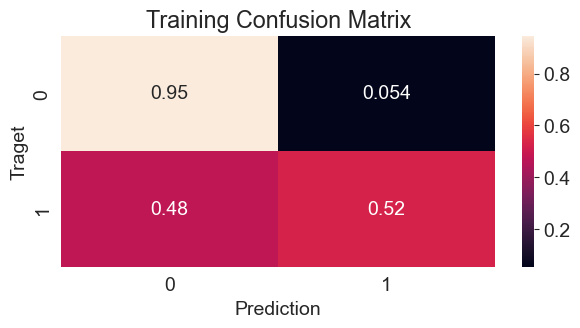

In [74]:
predict_and_plot(x_train,target_train,'Training')

Accuracy: 85.42%


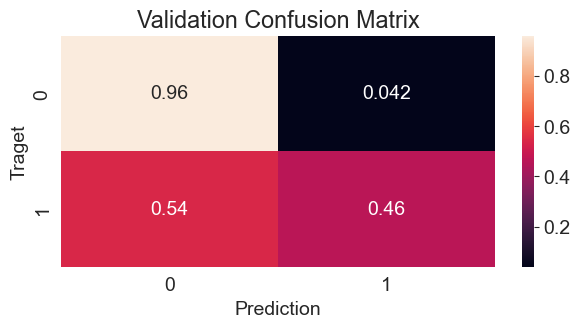

In [75]:
predict_and_plot(x_val,target_val,'Validation')

Accuracy: 84.19%


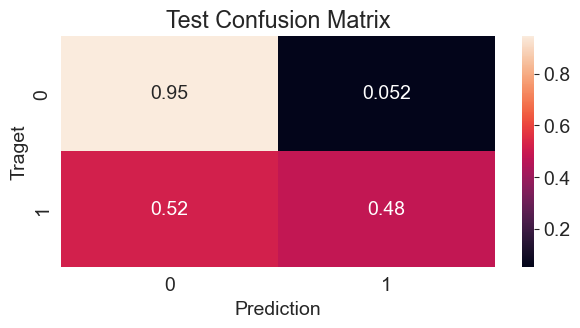

In [76]:
predict_and_plot(x_test,target_test,'Test')

# Comparing our Model with Random Models

Our model, is better than random models, as the accuracy score of our model is 85%, which better than a randomly generated target, or even a target of 'all nos'

In [77]:
def random_guess(inputs):
    return np.random.choice(['No','Yes'],len(inputs))

In [78]:
random_guess(x_test)

array(['No', 'Yes', 'Yes', ..., 'Yes', 'No', 'Yes'], dtype='<U3')

In [79]:
def all_no(inputs):
    return np.full(len(inputs),'No')

In [80]:
all_no(x_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

In [81]:
accuracy_score(target_test, random_guess(x_test))

0.5015169194865811

In [82]:
accuracy_score(target_test, all_no(x_test))

0.7734344612991054

# Using our model for prediction

In [83]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes',
             'Month': 'July'}

# Manipulating the data to match the original format 

In [84]:
new_input_df=pd.DataFrame([new_input])

In [85]:
new_input_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
0,2021-06-19,Katherine,23.2,33.2,10.2,4.2,NaN,NNW,52.0,NW,...,89.0,58.0,1004.8,1001.5,8.0,5.0,25.7,33.0,Yes,July


In [99]:
new_input_df[num_cols]=imputer.transform(new_input_df[num_cols]).copy()
new_input_df[num_cols]=scaler.transform(new_input_df[num_cols]).copy()
new_input_df[enc_cols]=encoder.transform(new_input_df[cat_cols]).copy()


In [87]:
new_input_df[enc_cols]=encoder.transform(new_input_df[cat_cols])

In [88]:
x_new_input=new_input_df[num_cols+enc_cols]
x_new_input

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,0.747642,0.718336,0.027493,0.028966,0.526244,0.356589,0.1,0.229885,0.89,0.58,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
prediction= model.predict(x_new_input)[0]
prediction

'Yes'

In [90]:
prob=model.predict_proba(x_new_input)[0]
prob

array([0.43037346, 0.56962654])

# Helper Function for a Single Input

In [91]:
def predict_input(single_input):
    input_df=pd.DataFrame([single_input])
    input_df[num_cols]=imputer.transform(input_df[num_cols]).copy()
    input_df[num_cols]=scaler.transform(input_df[num_cols]).copy()
    input_df[enc_cols]=encoder.transform(input_df[cat_cols]).copy()
    
    x_input = pd.concat([input_df[num_cols], input_df[enc_cols]], axis=1)
    pred=model.predict(x_input)[0]
    prob=model.predict_proba(x_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [92]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes',
             'Month': 'December'}

In [100]:
predict_input(new_input)

C:\Users\alika\AppData\Local\Temp\ipykernel_11268\2461180723.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\alika\AppData\Local\Temp\ipykernel_11268\2461180723.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\alika\AppData\Local\Temp\ipykernel_11268\2461180723.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

('Yes', 0.6867531660226317)

The given input data gives the result that there is a 68% chance of rain tomorrow.